<a href="https://colab.research.google.com/github/internship-bvoc2020/MachineLearning/blob/master/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("employee_data.csv",sep="\t")

In [0]:
df.head()

In [0]:
df.shape

In [0]:
df.dtypes

In [0]:
df.corr()

**Continous Variables**

In [0]:
num_cols = df._get_numeric_data().columns
num_cols

In [0]:
#Continous
for i in num_cols:
  print(str(i)+'\t'+str(len(df[i].unique())))

**Categorical Variables**

In [0]:
for j in list(set(df.columns) - set(num_cols)):
  print(str(j)+'\t'+str(len(df[j].unique())))

In [0]:
df['relationship'].unique()

**Why Encoding is required ?**

Few algorithms such as CAT Boost, decision-trees etc can handle categorical values (Textual) very well but most of the algorithms expect numerical values to achieve state-of-the-art results.

Infact , most of the algorithms work better with numerical inputs

**Types of Encoding**

1.   Label-Encoder : 
2.   One-Hot-Encoder :



### Label Encoding 
It involves converting each value in a column to a number

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [0]:
df_cat = df.copy()

In [0]:
#Fit- Transform is followed for each method in scikit Learn where fit implies fitting the data into the method 
# and then transforming it based on method functionality

le = LabelEncoder()
df_cat['enc_relationship'] = le.fit_transform(df_cat['relationship'])

In [0]:
df_cat.groupby(['relationship','enc_relationship']).size().reset_index().rename(columns={0:'count'})

In [0]:
df_cat = df_cat.drop(columns=['enc_relationship'])
for j in list(set(df.columns) - set(num_cols)):
  df_cat['enc_'+str(j)] = le.fit_transform(df_cat[j])

In [0]:
df_cat.columns

In [0]:
df_cat.groupby(['education','enc_education']).size().reset_index().rename(columns={0:'count'})

In [0]:
df_cat = df_cat.drop(columns = list(set(df.columns) - set(num_cols)))
df_cat.columns

In [0]:
df_cat.head()

### Correlation

Depicts relationship between two or more variables within a dataset



*   It is a degree of measure which can be Positive , Negative or Unrelated (No effect)
*   *Positive Correlation* : implies as  increase (or decrease) in one variable, leads to  a simultaneous increase (decrease) in the other variable
*   *Negative Correlation* : is a type where if there is a decrease (or increase) in one variable, then there is a simultaneous increase (or decrease) in the other variables.Inverse behaviour in variables
*  *Uncorrelated* : When both variables have no corresponding impact on each other on increase or decrease.They are supposed to be mutually exclusive

**Correlation Coefficient** : also known as Pearson Correlation co-efficient 


*   Ranges from -1 to +1
*   -ve values imply negative correlation with , +ve values positive correlation and 0 imples uncorrelated

Pearson Correlation only works on Numeric datatype



**Correlation on Label Encoded Dataframe**

In [51]:
corr = df_cat.corr()
corr.head()

,age,salary,hours_per_week,enc_employment_type,enc_relationship,enc_Gender,enc_education,enc_marital-status
age,1.000000,-0.115232,0.084987,0.029712,-0.260360,0.094576,-0.049660,-0.258981
salary,-0.115232,1.000000,-0.039744,0.018486,0.067417,-0.003753,-0.034706,0.080250
hours_per_week,0.084987,-0.039744,1.000000,0.146897,-0.256502,0.208244,0.127367,-0.248255
enc_employment_type,0.029712,0.018486,0.146897,1.000000,-0.136794,0.105727,0.056378,-0.081510
enc_relationship,-0.260360,0.067417,-0.256502,-0.136794,1.000000,-0.559848,-0.008405,0.167292


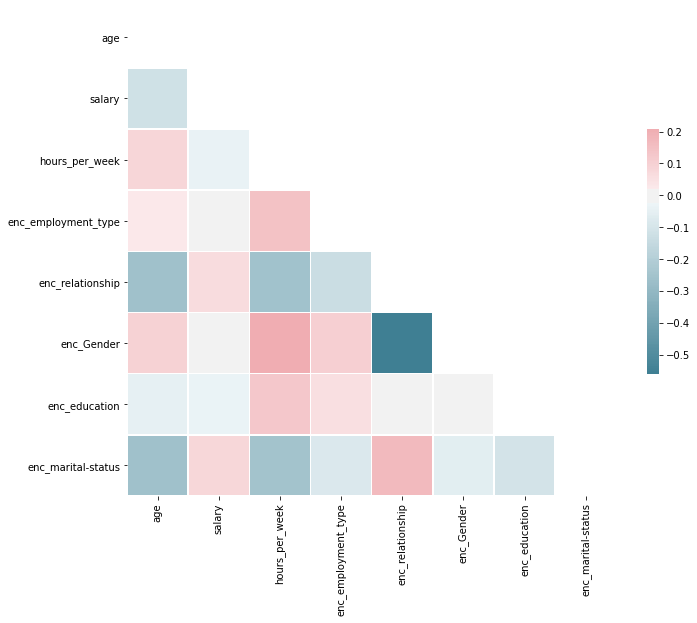

In [52]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio( https://seaborn.pydata.org/generated/seaborn.heatmap.html )
svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

### Issues with Categorical Encoding 

Adds an inherent bias of ranking in the encoding values of a Feature , usually interpreted by the algorithm 0<1<2<3.

We should always try to remove any inherent bias being fed into the algorithm ,rather let algorithm identify the patterns if they exist


### One Hot Encoding (OHE)

Involves converting each value in a column to a unique number
each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column

This in turn removes the shortcomings of Label Encoder by not inherently feeding an algortihm with an encoded rank system 

There are couple of methods to perform OHE 


1.   One Hot Encoding : Sklearn Preprocessing library 

(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
2.   Pandas Get Dummies : Native method of Pandas library

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html




In [0]:
df_ohe = df.copy()

In [0]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [0]:
enc_rel = pd.DataFrame(ohe.fit_transform(df_ohe[['relationship']]).toarray())

In [0]:
enc_rel

In [0]:
enc_rel = enc_rel.add_prefix('relationship_')
enc_rel

In [0]:
df_ohe = df_ohe.join(enc_rel)
df_ohe.head(10)

**Doing the OHE programmatically for all Categorical variables**

In [0]:
df_ohe = df_ohe = df.copy()
for j in list(set(df.columns) - set(num_cols)):
  enc_rel = pd.DataFrame(ohe.fit_transform(df_ohe[[j]]).toarray())
  enc_rel = enc_rel.add_prefix(str(j)+'_')
  df_ohe = df_ohe.join(enc_rel)

In [0]:
df_ohe.columns

In [0]:
df_ohe = df_ohe.drop(columns = list(set(df.columns) - set(num_cols)))
df_ohe.columns

In [0]:
df_ohe.head()

In [0]:
df_ohe.shape

**Performing OHE using Pandas Dummies**

Pandas Dummies has multiple advantages over sklearn OneHotEncoder



*   It takes each value of the categorical column and uses that as Encoded Column Header
*   It removes the categorical column automatically post OneHotEncoding

*   OHE columns are by default joined to original dataframe and thus no join operation needed






In [0]:
df_ohe = df.copy()

In [0]:
 enc_rel = pd.get_dummies(df_ohe, columns=['relationship'], prefix=['relationship'] ) 

In [0]:
enc_rel

In [0]:
df_ohe = df.copy()
for j in list(set(df.columns) - set(num_cols)): 
  df_ohe = pd.get_dummies(df_ohe, columns=[j], prefix=[j] )


In [0]:
df_ohe.columns

In [0]:
df_ohe.head()

In [0]:
df_ohe.shape

**Correlation Heatmap on One Hot Encoded dataframe**

In [53]:
df_ohe.corr().head()

,age,salary,hours_per_week,employment_type_ ?,employment_type_ Federal-gov,employment_type_ Local-gov,employment_type_ Private,employment_type_ Self-emp-inc,employment_type_ Self-emp-not-inc,employment_type_ State-gov,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,Gender_ Female,Gender_ Male,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed
age,1.000000,-0.115232,0.084987,0.059446,0.020820,0.065330,-0.211414,0.099589,0.197017,-0.042472,0.326545,-0.018319,-0.067532,-0.448779,0.072813,-0.003714,-0.094576,0.094576,0.026747,-0.059274,-0.048971,0.110934,-0.004137,0.087312,0.016284,-0.017570,0.008521,-0.023994,0.056006,0.048391,0.106230,0.047979,0.041350,-0.137083,0.121985,-0.045342,0.316993,0.002370,-0.509349,0.004303,0.252199
salary,-0.115232,1.000000,-0.039744,-0.033954,0.016538,0.041556,-0.005286,-0.048526,-0.006640,0.043208,-0.068061,-0.009982,0.048295,0.050142,0.044458,-0.007141,0.003753,-0.003753,-0.001010,0.032656,0.022288,0.026060,0.087222,-0.003484,-0.010006,-0.049403,-0.048574,0.026871,0.027369,0.000122,-0.039767,-0.000330,-0.050052,0.003508,-0.031938,0.103903,-0.077728,0.024513,0.052345,0.141943,-0.031278
hours_per_week,0.084987,-0.039744,1.000000,-0.199754,0.003724,0.034762,-0.003281,0.187396,0.057348,-0.044340,0.240283,0.044955,-0.026307,-0.283118,-0.084558,-0.019636,-0.208244,0.208244,-0.090795,-0.188789,-0.042114,-0.033982,-0.008199,-0.007279,-0.079618,0.027007,-0.003423,0.112869,0.109126,0.019986,0.093606,-0.008756,0.087954,-0.062690,0.080470,-0.039268,0.224152,-0.037562,-0.219006,-0.050452,-0.118284
employment_type_ ?,0.059446,-0.033954,-0.199754,1.000000,-0.037266,-0.069945,-0.391495,-0.047436,-0.076456,-0.051143,-0.070425,-0.045780,0.068404,0.102439,0.020756,0.003415,0.062837,-0.062837,0.049301,0.082498,0.063703,0.128572,0.012586,0.036622,0.000068,-0.002785,0.022585,-0.092653,-0.031082,-0.056534,-0.024386,-0.011675,-0.026215,0.051306,-0.001350,-0.008252,-0.061714,0.071028,0.026518,-0.044279,0.101240
employment_type_ Federal-gov,0.020820,0.016538,0.003724,-0.037266,1.000000,-0.039184,-0.219320,-0.026574,-0.042832,-0.028651,-0.008438,0.023893,-0.022917,-0.000946,-0.002971,-0.007392,-0.024069,0.024069,-0.021404,-0.032100,-0.013925,-0.012268,-0.015410,-0.018033,0.038316,0.012017,0.002024,-0.006462,0.043407,-0.020197,0.093056,-0.006541,-0.014686,-0.009648,0.028547,-0.004623,0.000921,-0.018033,0.001648,-0.024806,-0.025703


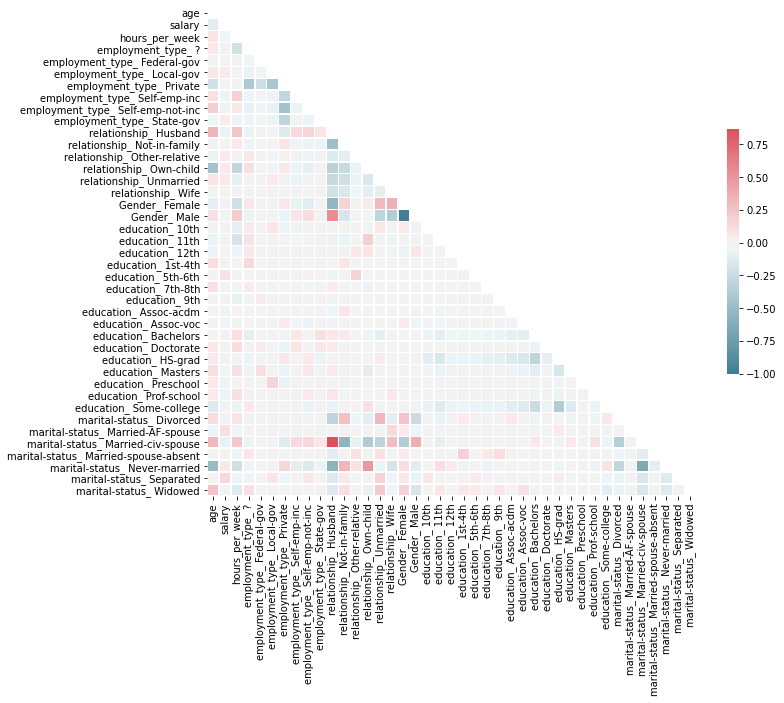

In [54]:
corr_ohe = df_ohe.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_ohe, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
svm = sns.heatmap(corr_ohe, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

Highly Correlated variables do not help in explaining variance in a Linear Models (Regression) and thus can be removed. It implies that predicting power remains same when either one of the correlated variable is kept in the model

The above phenomenon is known as **Multicollinearity**.When variables are perfectly correlated either positively or negatively then Multicollinearity is said to be highest 

In Trees based model - Decision trees ,Random Forests , Boosting model or  Neural Networks , Multicollinearity does not impact as is taken care of by the models itself
